<a href="https://colab.research.google.com/github/joaovictordemelo/brazilian-traffic-test-120/blob/main/DetectionYOLOv8Robusto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#detection Video FrameWorks

In [2]:

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.2/112.6 GB disk)


In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
#source https://github.com/roboflow/notebooks/blob/main/notebooks/train-yolov8-object-detection-on-custom-dataset.ipynb

In [ ]:
#mod = "/content/drive/MyDrive/Lab Transcolar /28-06-2024/trains/v1/best.pt"

In [ ]:
#file_path = "/content/istockphoto-1156490264-612x612.jpg"

#Select specific dataset

In [23]:
import os
import shutil
import re

def copy_images_with_pattern(src_dir, dest_dir, pattern):
    # Ensure the destination directory exists
    if not os.path.exists(dest_dir):
        os.makedirs(dest_dir)

    # Regular expression pattern to match files like framesNew0-00-08.***.jpg
    regex = re.compile(pattern)

    # Iterate through the files in the source directory
    for filename in os.listdir(src_dir):
        if regex.match(filename):  # Check if the file matches the regex pattern
            src_file = os.path.join(src_dir, filename)
            dest_file = os.path.join(dest_dir, filename)
            # Copy the file to the destination directory
            shutil.copy(src_file, dest_file)
            print(f"Copied: {filename}")

# Usage example:
source_directory = '/content/drive/MyDrive/detecçãoANPET/placasD/353EMG0300_C-opencv'
destination_directory = '/content/drive/MyDrive/Transcolar/versionsRobusto/dataset'
pattern = r"framesNew0-03-15\.\d+\.jpg"  # This regex will match framesNew0-00-08.***.jpg, where *** is a 3-digit number

copy_images_with_pattern(source_directory, destination_directory, pattern)


Copied: framesNew0-03-15.28167.jpg
Copied: framesNew0-03-15.228367.jpg
Copied: framesNew0-03-15.428567.jpg
Copied: framesNew0-03-15.628767.jpg
Copied: framesNew0-03-15.828967.jpg


In [57]:
!yolo task=detect mode=predict model="/content/drive/MyDrive/Transcolar/versionsRobusto/Yolov8/models/yolov8-5.pt" conf=0.7 source='/content/A-22.png' save=True


/usr/local/lib/python3.11/dist-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file  # load


In [56]:
!yolo task=detect mode=predict model="/content/drive/MyDrive/Transcolar/versionsRobusto/Yolov11/models/yolov11-6.pt" conf=0.6    source='/content/A-22.png' save=True


/usr/local/lib/python3.11/dist-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file  # load


In [ ]:
import os
import subprocess
import re

In [ ]:
#yolo_command = f'yolo task=detect mode=predict save=True model="{mod}" conf=0.3 source="{file_path}"'

In [ ]:
#result = subprocess.run(yolo_command, shell=True, capture_output=True, text=True)

In [ ]:
import os
import subprocess
import re  # Make sure to import the re module

# Define the directory containing the files and the YOLO model
dir_path = "/content/drive/MyDrive/detecçãoANPET/placasD/353EMG0300_C-opencv"  # Set your directory path here
mod = "/content/drive/MyDrive/Transcolar/versionsRobusto/Yolov8/models/yolov8-1.pt"
# Define the regex pattern you're searching for in the output
pattern = r"image 1/1 .+"

# Initialize a list to store matched lines
plates = []

# Check if the directory exists
if os.path.isdir(dir_path):
    print(f"Processing directory: {dir_path}")

    # Iterate through the files in the directory
    for filename in os.listdir(dir_path):
        file_path = os.path.join(dir_path, filename)

        #file_path = "/content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-45.41667.jpg"

        # Construct the YOLO command
        yolo_command = f'yolo task=detect mode=predict save=True model="{mod}" conf=0.85 source="{file_path}"'

        try:
            print(f"Executing YOLO command: {yolo_command}")
            # Run the YOLO command
            result = subprocess.run(yolo_command, shell=True, capture_output=True, text=True)
            print(result)

            # Search for the pattern in the command output
            line = re.findall(pattern, result.stderr)
            plates.extend(line)

            # Print the results for each file
            print(f"Matches for {file_path}: {line}")

        except subprocess.CalledProcessError as e:
            print(f"Error executing YOLO command for {file_path}: {e}")

else:
    print(f"Directory {dir_path} does not exist.")


Processing directory: /content/drive/MyDrive/detecçãoANPET/placasD/353EMG0300_C-opencv
Executing YOLO command: yolo task=detect mode=predict save=True model="/content/drive/MyDrive/Transcolar/versionsRobusto/Yolov8/models/yolov8-1.pt" conf=0.85 source="/content/drive/MyDrive/detecçãoANPET/placasD/353EMG0300_C-opencv/framesNew0-09-08.14133.jpg"
CompletedProcess(args='yolo task=detect mode=predict save=True model="/content/drive/MyDrive/Transcolar/versionsRobusto/Yolov8/models/yolov8-1.pt" conf=0.85 source="/content/drive/MyDrive/detecçãoANPET/placasD/353EMG0300_C-opencv/framesNew0-09-08.14133.jpg"', returncode=0, stdout='', stderr="/usr/local/lib/python3.11/dist-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
plates

['image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-14.00.jpg: 384x800 (no detections), 259.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-00.816667.jpg: 384x800 (no detections), 257.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-39.00.jpg: 384x800 (no detections), 156.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-06.616667.jpg: 384x800 (no detections), 239.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-48.416667.jpg: 384x800 (no detections), 171.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-13.616667.jpg: 384x800 (no detections), 245.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-55.600000.jpg: 384x800 (no detections), 164.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08

#Annex (extracting the time and detection)


In [ ]:

#Placas:

# A-2a - 0:17
# A-20b - 0:28
# A-2b - 0:29
# ? - 0:31
# ? - 0:48
# ? - 0:50
# R-19 - 0:53
# R-7 - 1:03
# Marcadores de Alinhamento - 1:04
# ROI-2 - 1:05
# ? - 1:07
# ? - 1:16
# A-22 - 1:16
# ? - 1:20
# ? - 1:21
# ? - 1:21
# A-18 - 1:22
# A-18  -1:25
# A-18  -1:30
# A-18  -1:31
# ? - 1:32
# ?   - 1:34
# ?  - 1:35
# ? - 1:35
# A-18   -1:43
# ROI-1 -   1:43
# ? - 1:43
# ? - 1:43
# ? - 1:44
# Advertência Informativa 10-1:45
# ? - 1:49
# Advertência Informativa 10 - 1:51
# ? - 1:53
# Advertência Informativa 10 - 1:58
# ? - 2:00
# R-19 - 2:00
# ? - 2:02
# ? - 2:04
# Advertência Informativa 10 - 2:05
# ? - 2:06
# R-19 - 2:14
# ? - 2:20
# R-19 - 2:21
# ? - 2:21
# ? - 2:23
# R-2 - 2:26


In [ ]:
# placas = {
#     '0-00-17.00': 'A-2a',
#     '0-00-28.00': 'A-20b',
#     '0-00-29.00': 'A-2b',
#     '0-00-31.00': '?',
#     '0-00-48.00': '?',
#     '0-00-50.00': '?',
#     '0-00-53.00': 'R-19',
#     '0-01-03.00': 'R-7',
#     '0-01-04.00': 'Marcadores de alinhamento',
#     '0-01-05.00': 'ROI-2',
#     '0-01-07.00': '?',
#     '0-01-16.00': '?',
#     '0-01-16.00': 'A-22',
#     '0-01-20.00': '?',
#     '0-01-21.00': '?',
#     '0-01-21.00': '?',
#     '0-01-22.00': 'A-18',
#     '0-01-25.00': 'A-18',
#     '0-01-30.00': 'A-18',
#     '0-01-31.00': 'A-18',
#     '0-01-32.00': '?',
#     '0-01-34.00': '?',
#     '0-01-35.00': '?',
#     '0-01-35.00': '?',
#     '0-01-43.00': 'A-18',
#     '0-01-43.00': 'ROI-1',
#     '0-01-43.00': '?',
#     '0-01-43.00': '?',
#     '0-01-44.00': '?',
#     '0-01-45.00': 'Advertencia informativa 10',
#     '0-01-49.00': '?',
#     '0-01-51.00': 'Advertencia informativa 10',
#     '0-01-53.00': '?',
#     '0-01-58.00': 'Advertencia informativa 10',
#     '0-02-00.00': '?',
#     '0-02-00.00': 'R-19',
#     '0-02-02.00': '?',
#     '0-02-04.00': '?',
#     '0-02-05.00': 'Advertencia informativa 10',
#     '0-02-06.00': '?',
#     '0-02-14.00': 'R-19',
#     '0-02-20.00': '?',
#     '0-02-21.00': 'R-19',
#     '0-02-21.00': '?',
#     '0-02-23.00': '?',
#     '0-02-26.00': 'R-2',
# }


In [ ]:
placas_linha = {
    '0-00-17.00': 'A-1a',
    '0-00-28.00': 'A-20b',
    '0-00-29.00': 'A-2b',
    '0-00-53.00': 'R-19',
    '0-01-03.00': 'R-7',
    '0-01-04.00': 'Marcadores de alinhamento',
    '0-01-05.00': 'ROI-2',
    '0-01-16.00': 'A-22',
    '0-01-22.00': 'A-18',
    '0-01-25.00': 'A-18',
    '0-01-30.00': 'A-18',
    '0-01-31.00': 'A-18',
    '0-01-43.00': 'A-18',
    '0-01-43.00': 'ROI-1',
    '0-01-45.00': 'Advertencia informativa 10',
    '0-01-51.00': 'Advertencia informativa 10',
    '0-01-58.00': 'Advertencia informativa 10',
    '0-02-00.00': 'R-19',
    '0-02-05.00': 'Advertencia informativa 10',
    '0-02-14.00': 'R-19',
    '0-02-21.00': 'R-19',
    '0-02-26.00': 'R-2',
}


In [ ]:
len(placas_linha)

21

In [ ]:
# import re

# # The given string list
# data = [
#     'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-32.816667.jpg: 384x800 (no detections), 292.3ms',
#     'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-40.416667.jpg: 384x800 (no detections), 177.7ms',
#     'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-31.216667.jpg: 384x800 1 A-1a, 269.6ms',
#     'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-14.200000.jpg: 384x800 (no detections), 176.0ms',
#     'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-05.400000.jpg: 384x800 1 ROI-2, 260.6ms',
#     'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-18.416667.jpg: 384x800 (no detections), 173.0ms',
#     'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-22.416667.jpg: 384x800 (no detections), 282.8ms',
#     'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-37.400000.jpg: 384x800 (no detections), 179.9ms',
#     'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-36.00.jpg: 384x800 (no detections), 285.2ms',
#     'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-10.616667.jpg: 384x800 (no detections), 174.3ms'
# ]

# # Initialize an empty dictionary to store the extracted data
# extracted_info = {}

# # Regex to match the relevant parts
# time_pattern = re.compile(r'framesNew(\d+-\d+-\d+\.\d+)\.jpg')
# detection_pattern = re.compile(r'\d+ (.*?)(?=,)|\((.*?)\)')
# import re



# # The given string list
# data = [
#     'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-32.816667.jpg: 384x800 (no detections), 292.3ms',
#     'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-40.416667.jpg: 384x800 (no detections), 177.7ms',
#     'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-31.216667.jpg: 384x800 1 A-1a, 2 A-2b, 269.6ms',
#     'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-14.200000.jpg: 384x800 (no detections), 176.0ms',
#     'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-05.400000.jpg: 384x800 1 ROI-2, 260.6ms',
#     'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-18.416667.jpg: 384x800 (no detections), 173.0ms',
#     'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-22.416667.jpg: 384x800 (no detections), 282.8ms',
#     'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-37.400000.jpg: 384x800 (no detections), 179.9ms',
#     'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-36.00.jpg: 384x800 (no detections), 285.2ms',
#     'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-10.616667.jpg: 384x800 (no detections), 174.3ms'
# ]

# # Initialize an empty dictionary to store the extracted data
# extracted_info = {}

# # Regex to match the time and detection parts
# time_pattern = re.compile(r'framesNew(\d+-\d+-\d+\.\d+)\.jpg')
# detection_pattern = re.compile(r': 384x800\s+(.*?)\s*,\s*\d+\.\d+ms')

# # Loop through the list and extract the needed info
# for item in data:
#     time_match = time_pattern.search(item)
#     detection_match = detection_pattern.search(item)

#     if time_match and detection_match:
#         time_info = time_match.group(1)
#         detection_info = detection_match.group(1)
#         extracted_info[time_info] = detection_info

# # Output the extracted map
# extracted_info




{'0-00-32.816667': '(no detections)',
 '0-00-40.416667': '(no detections)',
 '0-00-31.216667': '1 A-1a, 2 A-2b',
 '0-01-14.200000': '(no detections)',
 '0-01-05.400000': '1 ROI-2',
 '0-00-18.416667': '(no detections)',
 '0-00-22.416667': '(no detections)',
 '0-00-37.400000': '(no detections)',
 '0-00-36.00': '(no detections)',
 '0-00-10.616667': '(no detections)'}

##Extraction and compararison

In [ ]:
import re

# The given string list


# Initialize an empty dictionary to store the extracted data
extracted_info = {}

# Regex to match the relevant parts
time_pattern = re.compile(r'framesNew(\d+-\d+-\d+\.\d+)\.jpg')
detection_pattern = re.compile(r'\d+ (.*?)(?=,)|\((.*?)\)')
import re


data = ['image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-14.00.jpg: 384x800 (no detections), 312.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-00.816667.jpg: 384x800 (no detections), 202.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-39.00.jpg: 384x800 (no detections), 304.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-06.616667.jpg: 384x800 (no detections), 184.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-48.416667.jpg: 384x800 (no detections), 283.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-13.616667.jpg: 384x800 (no detections), 183.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-55.600000.jpg: 384x800 (no detections), 275.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-12.00.jpg: 384x800 (no detections), 349.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-19.00.jpg: 384x800 (no detections), 290.9ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-25.416667.jpg: 384x800 (no detections), 179.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-12.616667.jpg: 384x800 (no detections), 294.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-11.00.jpg: 384x800 (no detections), 181.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-14.800000.jpg: 384x800 (no detections), 273.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-29.800000.jpg: 384x800 (no detections), 182.1ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-45.416667.jpg: 384x800 (no detections), 285.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-03.00.jpg: 384x800 (no detections), 179.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-21.600000.jpg: 384x800 (no detections), 279.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-36.600000.jpg: 384x800 (no detections), 184.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-12.400000.jpg: 384x800 (no detections), 288.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-43.416667.jpg: 384x800 (no detections), 194.9ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-02.816667.jpg: 384x800 (no detections), 278.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-24.600000.jpg: 384x800 (no detections), 190.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-07.400000.jpg: 384x800 (no detections), 277.1ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-32.200000.jpg: 384x800 (no detections), 189.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-45.00.jpg: 384x800 (no detections), 294.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-02.416667.jpg: 384x800 (no detections), 185.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-03.416667.jpg: 384x800 (no detections), 282.9ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-16.816667.jpg: 384x800 (no detections), 184.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-27.216667.jpg: 384x800 (no detections), 276.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-18.600000.jpg: 384x800 (no detections), 184.9ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-13.400000.jpg: 384x800 (no detections), 285.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-05.816667.jpg: 384x800 (no detections), 185.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-17.00.jpg: 384x800 (no detections), 280.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-15.616667.jpg: 384x800 (no detections), 208.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-35.600000.jpg: 384x800 (no detections), 294.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-02.600000.jpg: 384x800 (no detections), 202.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-16.616667.jpg: 384x800 (no detections), 281.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-43.200000.jpg: 384x800 (no detections), 186.9ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-33.00.jpg: 384x800 (no detections), 282.9ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-12.800000.jpg: 384x800 (no detections), 179.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-00.00.jpg: 384x800 (no detections), 282.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-42.416667.jpg: 384x800 (no detections), 178.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-13.00.jpg: 384x800 (no detections), 280.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-19.200000.jpg: 384x800 (no detections), 200.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-42.00.jpg: 384x800 (no detections), 282.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-44.600000.jpg: 384x800 (no detections), 183.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-40.00.jpg: 384x800 (no detections), 293.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-50.416667.jpg: 384x800 (no detections), 193.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-20.416667.jpg: 384x800 (no detections), 284.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-56.200000.jpg: 384x800 (no detections), 182.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-01.600000.jpg: 384x800 (no detections), 283.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-10.400000.jpg: 384x800 (no detections), 184.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-38.200000.jpg: 384x800 (no detections), 299.1ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-01.416667.jpg: 384x800 (no detections), 182.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-50.600000.jpg: 384x800 (no detections), 286.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-21.800000.jpg: 384x800 (no detections), 192.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-11.616667.jpg: 384x800 (no detections), 281.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-03.200000.jpg: 384x800 1 R-7, 182.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-51.00.jpg: 384x800 (no detections), 291.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-34.400000.jpg: 384x800 (no detections), 180.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-08.616667.jpg: 384x800 (no detections), 283.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-12.800000.jpg: 384x800 (no detections), 174.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-29.00.jpg: 384x800 (no detections), 292.1ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-28.416667.jpg: 384x800 (no detections), 184.9ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-16.600000.jpg: 384x800 (no detections), 301.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-17.416667.jpg: 384x800 (no detections), 192.1ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-50.200000.jpg: 384x800 (no detections), 283.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-18.200000.jpg: 384x800 (no detections), 181.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-30.216667.jpg: 384x800 (no detections), 282.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-18.816667.jpg: 384x800 (no detections), 183.9ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-43.00.jpg: 384x800 (no detections), 285.1ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-02.416667.jpg: 384x800 (no detections), 185.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-08.400000.jpg: 384x800 (no detections), 298.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-23.416667.jpg: 384x800 (no detections), 186.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-12.200000.jpg: 384x800 (no detections), 282.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-15.616667.jpg: 384x800 (no detections), 191.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-24.800000.jpg: 384x800 (no detections), 286.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-19.816667.jpg: 384x800 (no detections), 182.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-07.00.jpg: 384x800 (no detections), 289.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-35.400000.jpg: 384x800 (no detections), 189.9ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-58.816667.jpg: 384x800 (no detections), 280.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-05.00.jpg: 384x800 (no detections), 186.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-24.216667.jpg: 384x800 (no detections), 282.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-51.816667.jpg: 384x800 (no detections), 188.1ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-58.200000.jpg: 384x800 (no detections), 291.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-07.616667.jpg: 384x800 (no detections), 180.9ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-15.400000.jpg: 384x800 (no detections), 280.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-57.00.jpg: 384x800 (no detections), 199.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-12.616667.jpg: 384x800 (no detections), 293.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-05.616667.jpg: 384x800 (no detections), 177.9ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-07.00.jpg: 384x800 (no detections), 279.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-02.600000.jpg: 384x800 (no detections), 180.9ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-01.800000.jpg: 384x800 (no detections), 309.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-16.200000.jpg: 384x800 (no detections), 183.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-49.600000.jpg: 384x800 (no detections), 286.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-17.00.jpg: 384x800 (no detections), 179.9ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-18.800000.jpg: 384x800 (no detections), 293.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-43.816667.jpg: 384x800 (no detections), 198.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-45.816667.jpg: 384x800 (no detections), 295.1ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-40.600000.jpg: 384x800 (no detections), 185.1ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-30.416667.jpg: 384x800 (no detections), 290.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-41.816667.jpg: 384x800 (no detections), 189.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-11.800000.jpg: 384x800 (no detections), 285.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-22.00.jpg: 384x800 (no detections), 185.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-28.00.jpg: 384x800 (no detections), 301.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-51.200000.jpg: 384x800 (no detections), 185.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-55.00.jpg: 384x800 (no detections), 283.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-15.216667.jpg: 384x800 (no detections), 195.9ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-52.600000.jpg: 384x800 (no detections), 289.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-43.600000.jpg: 384x800 (no detections), 181.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-26.416667.jpg: 384x800 (no detections), 282.9ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-46.416667.jpg: 384x800 (no detections), 183.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-10.00.jpg: 384x800 (no detections), 287.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-54.200000.jpg: 384x800 (no detections), 189.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-28.800000.jpg: 384x800 (no detections), 288.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-04.800000.jpg: 384x800 (no detections), 185.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-00.616667.jpg: 384x800 (no detections), 316.1ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-48.200000.jpg: 384x800 (no detections), 186.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-55.416667.jpg: 384x800 (no detections), 285.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-38.600000.jpg: 384x800 (no detections), 197.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-16.00.jpg: 384x800 (no detections), 291.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-56.816667.jpg: 384x800 (no detections), 192.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-37.600000.jpg: 384x800 (no detections), 279.9ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-57.416667.jpg: 384x800 (no detections), 186.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-54.416667.jpg: 384x800 (no detections), 292.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-47.816667.jpg: 384x800 (no detections), 186.9ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-11.400000.jpg: 384x800 (no detections), 279.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-15.400000.jpg: 384x800 (no detections), 189.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-26.600000.jpg: 384x800 (no detections), 276.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-47.600000.jpg: 384x800 (no detections), 192.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-20.600000.jpg: 384x800 (no detections), 294.1ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-05.616667.jpg: 384x800 (no detections), 190.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-06.400000.jpg: 384x800 (no detections), 284.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-14.216667.jpg: 384x800 (no detections), 185.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-05.200000.jpg: 384x800 (no detections), 286.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-20.216667.jpg: 384x800 (no detections), 182.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-07.200000.jpg: 384x800 (no detections), 278.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-13.616667.jpg: 384x800 (no detections), 187.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-44.816667.jpg: 384x800 (no detections), 283.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-17.400000.jpg: 384x800 (no detections), 189.1ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-57.816667.jpg: 384x800 (no detections), 295.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-20.00.jpg: 384x800 (no detections), 182.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-01.216667.jpg: 384x800 (no detections), 302.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-01.200000.jpg: 384x800 (no detections), 183.1ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-42.200000.jpg: 384x800 (no detections), 286.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-18.400000.jpg: 384x800 (no detections), 197.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-51.600000.jpg: 384x800 (no detections), 280.9ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-06.00.jpg: 384x800 (no detections), 182.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-00.800000.jpg: 384x800 (no detections), 288.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-10.800000.jpg: 384x800 (no detections), 186.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-10.800000.jpg: 384x800 (no detections), 281.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-16.00.jpg: 384x800 (no detections), 182.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-47.00.jpg: 384x800 (no detections), 284.1ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-08.800000.jpg: 384x800 (no detections), 184.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-33.600000.jpg: 384x800 (no detections), 300.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-59.00.jpg: 384x800 (no detections), 186.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-03.200000.jpg: 384x800 (no detections), 298.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-04.400000.jpg: 384x800 1 Marcadores de alinhamento, 187.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-01.416667.jpg: 384x800 (no detections), 278.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-11.00.jpg: 384x800 (no detections), 185.1ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-00.400000.jpg: 384x800 (no detections), 286.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-40.200000.jpg: 384x800 (no detections), 180.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-32.400000.jpg: 384x800 (no detections), 300.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-49.416667.jpg: 384x800 (no detections), 178.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-44.00.jpg: 384x800 (no detections), 278.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-34.200000.jpg: 384x800 (no detections), 195.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-32.600000.jpg: 384x800 (no detections), 290.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-15.800000.jpg: 384x800 (no detections), 182.9ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-15.00.jpg: 384x800 (no detections), 285.9ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-19.216667.jpg: 384x800 (no detections), 179.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-57.200000.jpg: 384x800 (no detections), 283.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-08.400000.jpg: 384x800 (no detections), 185.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-09.800000.jpg: 384x800 (no detections), 282.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-59.816667.jpg: 384x800 (no detections), 190.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-42.600000.jpg: 384x800 (no detections), 281.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-52.200000.jpg: 384x800 (no detections), 180.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-23.00.jpg: 384x800 (no detections), 295.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-03.600000.jpg: 384x800 (no detections), 179.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-55.200000.jpg: 384x800 (no detections), 279.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-54.600000.jpg: 384x800 (no detections), 193.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-16.400000.jpg: 384x800 1 A-22, 280.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-41.200000.jpg: 384x800 (no detections), 191.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-13.400000.jpg: 384x800 (no detections), 286.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-25.00.jpg: 384x800 (no detections), 175.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-48.600000.jpg: 384x800 1 A-2b, 288.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-59.416667.jpg: 384x800 (no detections), 183.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-16.416667.jpg: 384x800 (no detections), 295.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-53.00.jpg: 384x800 1 R-19, 180.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-56.416667.jpg: 384x800 (no detections), 292.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-54.00.jpg: 384x800 (no detections), 187.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-00.00.jpg: 384x800 (no detections), 281.9ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-26.216667.jpg: 384x800 (no detections), 177.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-18.00.jpg: 384x800 (no detections), 285.1ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-19.00.jpg: 384x800 (no detections), 178.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-37.200000.jpg: 384x800 (no detections), 281.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-11.216667.jpg: 384x800 (no detections), 186.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-15.200000.jpg: 384x800 (no detections), 292.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-37.816667.jpg: 384x800 (no detections), 191.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-26.800000.jpg: 384x800 (no detections), 282.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-02.00.jpg: 384x800 (no detections), 179.9ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-03.816667.jpg: 384x800 (no detections), 286.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-27.600000.jpg: 384x800 1 A-20b, 183.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-08.00.jpg: 384x800 (no detections), 284.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-31.800000.jpg: 384x800 (no detections), 184.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-41.600000.jpg: 384x800 1 A-20b, 301.9ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-08.800000.jpg: 384x800 (no detections), 179.9ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-18.00.jpg: 384x800 (no detections), 299.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-00.200000.jpg: 384x800 (no detections), 187.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-44.416667.jpg: 384x800 (no detections), 282.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-04.816667.jpg: 384x800 (no detections), 191.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-46.816667.jpg: 384x800 (no detections), 286.9ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-00.600000.jpg: 384x800 (no detections), 182.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-55.816667.jpg: 384x800 (no detections), 289.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-30.800000.jpg: 384x800 (no detections), 175.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-39.200000.jpg: 384x800 (no detections), 282.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-09.00.jpg: 384x800 (no detections), 184.9ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-50.816667.jpg: 384x800 (no detections), 304.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-53.416667.jpg: 384x800 1 R-19, 178.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-04.200000.jpg: 384x800 (no detections), 281.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-15.00.jpg: 384x800 (no detections), 191.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-14.00.jpg: 384x800 (no detections), 275.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-02.200000.jpg: 384x800 (no detections), 186.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-47.416667.jpg: 384x800 (no detections), 285.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-39.600000.jpg: 384x800 (no detections), 178.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-18.616667.jpg: 384x800 (no detections), 309.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-53.816667.jpg: 384x800 (no detections), 188.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-29.216667.jpg: 384x800 1 A-1a, 294.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-05.00.jpg: 384x800 (no detections), 183.9ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-09.200000.jpg: 384x800 (no detections), 282.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-06.200000.jpg: 384x800 (no detections), 180.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-03.816667.jpg: 384x800 (no detections), 289.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-09.400000.jpg: 384x800 (no detections), 183.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-47.200000.jpg: 384x800 (no detections), 280.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-00.416667.jpg: 384x800 (no detections), 183.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-02.00.jpg: 384x800 (no detections), 307.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-32.816667.jpg: 384x800 (no detections), 181.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-40.416667.jpg: 384x800 (no detections), 286.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-31.216667.jpg: 384x800 1 A-2b, 1 Advertencia informativa 10, 199.1ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-14.200000.jpg: 384x800 (no detections), 282.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-05.400000.jpg: 384x800 1 ROI-2, 182.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-18.416667.jpg: 384x800 (no detections), 279.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-22.416667.jpg: 384x800 (no detections), 184.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-37.400000.jpg: 384x800 (no detections), 307.1ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-36.00.jpg: 384x800 (no detections), 179.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-10.616667.jpg: 384x800 (no detections), 292.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-37.00.jpg: 384x800 (no detections), 195.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-26.00.jpg: 384x800 (no detections), 289.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-01.00.jpg: 384x800 (no detections), 187.1ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-02.816667.jpg: 384x800 (no detections), 284.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-06.800000.jpg: 384x800 (no detections), 184.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-46.200000.jpg: 384x800 (no detections), 285.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-13.00.jpg: 384x800 (no detections), 182.1ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-44.200000.jpg: 384x800 (no detections), 288.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-28.216667.jpg: 384x800 (no detections), 190.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-46.600000.jpg: 384x800 (no detections), 285.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-09.400000.jpg: 384x800 (no detections), 187.9ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-38.416667.jpg: 384x800 (no detections), 273.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-21.216667.jpg: 384x800 (no detections), 180.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-58.416667.jpg: 384x800 (no detections), 273.1ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-31.416667.jpg: 384x800 (no detections), 182.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-17.200000.jpg: 384x800 (no detections), 300.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-08.216667.jpg: 384x800 (no detections), 179.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-13.216667.jpg: 384x800 (no detections), 316.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-30.600000.jpg: 384x800 (no detections), 196.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-19.616667.jpg: 384x800 (no detections), 280.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-14.800000.jpg: 384x800 (no detections), 180.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-03.00.jpg: 384x800 (no detections), 276.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-53.200000.jpg: 384x800 (no detections), 182.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-31.00.jpg: 384x800 1 Advertencia informativa 10, 282.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-11.200000.jpg: 384x800 (no detections), 182.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-15.800000.jpg: 384x800 (no detections), 301.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-32.00.jpg: 384x800 (no detections), 186.1ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-19.416667.jpg: 384x800 (no detections), 292.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-22.800000.jpg: 384x800 (no detections), 187.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-14.400000.jpg: 384x800 (no detections), 290.1ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-03.600000.jpg: 384x800 (no detections), 196.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-16.800000.jpg: 384x800 (no detections), 280.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-25.600000.jpg: 384x800 (no detections), 176.9ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-35.816667.jpg: 384x800 (no detections), 280.1ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-35.200000.jpg: 384x800 (no detections), 185.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-59.600000.jpg: 384x800 (no detections), 281.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-09.216667.jpg: 384x800 (no detections), 179.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-49.00.jpg: 384x800 (no detections), 294.1ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-46.00.jpg: 384x800 (no detections), 185.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-34.00.jpg: 384x800 (no detections), 301.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-04.200000.jpg: 384x800 1 Advertencia informativa 10, 200.1ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-04.400000.jpg: 384x800 (no detections), 283.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-31.600000.jpg: 384x800 (no detections), 191.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-11.800000.jpg: 384x800 (no detections), 291.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-11.400000.jpg: 384x800 (no detections), 182.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-33.816667.jpg: 384x800 (no detections), 293.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-33.200000.jpg: 384x800 (no detections), 180.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-35.00.jpg: 384x800 (no detections), 293.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-10.00.jpg: 384x800 (no detections), 184.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-38.816667.jpg: 384x800 (no detections), 286.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-22.600000.jpg: 384x800 (no detections), 193.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-49.816667.jpg: 384x800 (no detections), 288.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-06.616667.jpg: 384x800 (no detections), 203.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-56.600000.jpg: 384x800 (no detections), 286.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-08.600000.jpg: 384x800 (no detections), 209.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-25.800000.jpg: 384x800 (no detections), 289.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-25.216667.jpg: 384x800 (no detections), 181.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-22.216667.jpg: 384x800 (no detections), 284.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-07.400000.jpg: 384x800 (no detections), 182.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-09.800000.jpg: 384x800 (no detections), 291.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-27.416667.jpg: 384x800 (no detections), 182.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-40.816667.jpg: 384x800 (no detections), 279.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-13.800000.jpg: 384x800 (no detections), 184.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-36.400000.jpg: 384x800 (no detections), 295.1ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-18.200000.jpg: 384x800 (no detections), 182.1ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-41.416667.jpg: 384x800 (no detections), 281.1ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-39.416667.jpg: 384x800 (no detections), 192.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-11.616667.jpg: 384x800 (no detections), 294.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-27.800000.jpg: 384x800 (no detections), 194.1ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-21.416667.jpg: 384x800 (no detections), 294.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-19.600000.jpg: 384x800 (no detections), 180.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-16.200000.jpg: 384x800 (no detections), 289.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-20.800000.jpg: 384x800 (no detections), 184.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-30.00.jpg: 384x800 (no detections), 283.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-05.200000.jpg: 384x800 (no detections), 180.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-58.00.jpg: 384x800 (no detections), 280.9ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-52.416667.jpg: 384x800 (no detections), 183.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-05.800000.jpg: 384x800 (no detections), 293.1ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-17.616667.jpg: 384x800 (no detections), 183.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-52.00.jpg: 384x800 (no detections), 287.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-10.616667.jpg: 384x800 (no detections), 195.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-17.200000.jpg: 384x800 (no detections), 287.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-34.816667.jpg: 384x800 (no detections), 185.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-12.400000.jpg: 384x800 (no detections), 290.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-28.600000.jpg: 384x800 (no detections), 182.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-02.200000.jpg: 384x800 (no detections), 288.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-39.816667.jpg: 384x800 (no detections), 195.1ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-04.00.jpg: 384x800 1 Marcadores de alinhamento, 298.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-42.816667.jpg: 384x800 (no detections), 185.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-56.00.jpg: 384x800 (no detections), 292.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-06.400000.jpg: 384x800 (no detections), 190.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-07.800000.jpg: 384x800 (no detections), 466.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-34.600000.jpg: 384x800 (no detections), 218.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-10.200000.jpg: 384x800 (no detections), 321.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-48.00.jpg: 384x800 (no detections), 193.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-38.00.jpg: 384x800 (no detections), 320.9ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-33.400000.jpg: 384x800 (no detections), 186.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-10.216667.jpg: 384x800 (no detections), 319.1ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-12.216667.jpg: 384x800 (no detections), 187.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-57.600000.jpg: 384x800 (no detections), 296.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-53.600000.jpg: 384x800 (no detections), 188.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-04.00.jpg: 384x800 (no detections), 312.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-09.616667.jpg: 384x800 (no detections), 186.9ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-01.816667.jpg: 384x800 (no detections), 285.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-45.600000.jpg: 384x800 (no detections), 181.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-17.816667.jpg: 384x800 (no detections), 292.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-54.816667.jpg: 384x800 (no detections), 189.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-58.600000.jpg: 384x800 (no detections), 281.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-21.00.jpg: 384x800 (no detections), 198.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-50.00.jpg: 384x800 (no detections), 293.9ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-23.216667.jpg: 384x800 (no detections), 183.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-09.00.jpg: 384x800 (no detections), 280.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-23.800000.jpg: 384x800 (no detections), 186.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-03.416667.jpg: 384x800 1 R-7, 276.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-27.00.jpg: 384x800 (no detections), 191.1ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-36.200000.jpg: 384x800 (no detections), 273.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-24.416667.jpg: 384x800 (no detections), 186.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-48.816667.jpg: 384x800 (no detections), 292.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-14.400000.jpg: 384x800 (no detections), 196.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-59.200000.jpg: 384x800 (no detections), 286.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-12.00.jpg: 384x800 (no detections), 189.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-13.800000.jpg: 384x800 (no detections), 277.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-08.00.jpg: 384x800 (no detections), 180.9ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-51.416667.jpg: 384x800 1 A-20b, 283.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-29.416667.jpg: 384x800 (no detections), 191.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-41.00.jpg: 384x800 (no detections), 288.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-52.816667.jpg: 384x800 (no detections), 185.9ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-14.616667.jpg: 384x800 (no detections), 292.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-17.600000.jpg: 384x800 (no detections), 190.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-04.616667.jpg: 384x800 (no detections), 286.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-07.616667.jpg: 384x800 (no detections), 185.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-09.616667.jpg: 384x800 (no detections), 324.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-23.600000.jpg: 384x800 (no detections), 185.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-24.00.jpg: 384x800 (no detections), 316.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-49.200000.jpg: 384x800 (no detections), 188.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-05.400000.jpg: 384x800 (no detections), 286.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-06.00.jpg: 384x800 (no detections), 191.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-07.816667.jpg: 384x800 (no detections), 285.1ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-19.800000.jpg: 384x800 (no detections), 187.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-07.200000.jpg: 384x800 (no detections), 292.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-19.400000.jpg: 384x800 (no detections), 199.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-01.600000.jpg: 384x800 (no detections), 289.1ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-04.616667.jpg: 384x800 (no detections), 203.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-17.800000.jpg: 384x800 (no detections), 303.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-08.200000.jpg: 384x800 (no detections), 200.1ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-06.816667.jpg: 384x800 (no detections), 312.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-10.400000.jpg: 384x800 (no detections), 200.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-06.200000.jpg: 384x800 (no detections), 289.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-14.616667.jpg: 384x800 (no detections), 196.9ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-01.00.jpg: 384x800 (no detections), 307.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-00.200000.jpg: 384x800 (no detections), 202.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-29.600000.jpg: 384x800 (no detections), 288.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-36.816667.jpg: 384x800 (no detections), 187.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-00-45.200000.jpg: 384x800 (no detections), 279.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew0-01-13.200000.jpg: 384x800 (no detections), 185.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-45.41667.jpg: 384x800 1 Advertencia informativa 10, 281.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-30.43333.jpg: 384x800 (no detections), 185.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-25.43333.jpg: 384x800 (no detections), 286.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-35.43333.jpg: 384x800 (no detections), 188.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-48.23333.jpg: 384x800 (no detections), 285.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-43.81667.jpg: 384x800 (no detections), 186.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-54.21667.jpg: 384x800 (no detections), 279.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-33.21667.jpg: 384x800 (no detections), 190.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-33.81667.jpg: 384x800 (no detections), 290.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-30.81667.jpg: 384x800 (no detections), 198.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-19.01667.jpg: 384x800 (no detections), 280.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-13.81667.jpg: 384x800 1 R-19, 198.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-36.43333.jpg: 384x800 (no detections), 283.9ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-50.23333.jpg: 384x800 (no detections), 189.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-45.23333.jpg: 384x800 (no detections), 293.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-5.41667.jpg: 384x800 (no detections), 188.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-57.63333.jpg: 384x800 (no detections), 288.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-52.41667.jpg: 384x800 (no detections), 185.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-36.81667.jpg: 384x800 (no detections), 291.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-52.81667.jpg: 384x800 (no detections), 186.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-22.01667.jpg: 384x800 (no detections), 274.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-35.61667.jpg: 384x800 (no detections), 185.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-26.43333.jpg: 384x800 (no detections), 272.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-31.61667.jpg: 384x800 (no detections), 186.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-4.01667.jpg: 384x800 (no detections), 314.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-25.81667.jpg: 384x800 (no detections), 199.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-23.41667.jpg: 384x800 (no detections), 277.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-34.01667.jpg: 384x800 (no detections), 186.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-32.43333.jpg: 384x800 (no detections), 280.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-10.81667.jpg: 384x800 (no detections), 184.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-55.41667.jpg: 384x800 (no detections), 285.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-7.81667.jpg: 384x800 (no detections), 186.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-32.81667.jpg: 384x800 (no detections), 293.1ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-30.01667.jpg: 384x800 (no detections), 185.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-16.41667.jpg: 384x800 (no detections), 302.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-22.81667.jpg: 384x800 (no detections), 180.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-23.63333.jpg: 384x800 (no detections), 289.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-27.81667.jpg: 384x800 (no detections), 186.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-29.43333.jpg: 384x800 (no detections), 283.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-5.23333.jpg: 384x800 1 Advertencia informativa 10, 194.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-15.23333.jpg: 384x800 (no detections), 284.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-6.81667.jpg: 384x800 (no detections), 201.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-51.61667.jpg: 384x800 (no detections), 290.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-47.03333.jpg: 384x800 (no detections), 186.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-29.61667.jpg: 384x800 (no detections), 282.9ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-52.63333.jpg: 384x800 1 Advertencia informativa 10, 194.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-4.81667.jpg: 384x800 (no detections), 290.1ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-56.41667.jpg: 384x800 (no detections), 184.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-56.01667.jpg: 384x800 (no detections), 289.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-22.63333.jpg: 384x800 (no detections), 217.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-34.21667.jpg: 384x800 (no detections), 279.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-14.81667.jpg: 384x800 (no detections), 187.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-56.63333.jpg: 384x800 (no detections), 289.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-26.81667.jpg: 384x800 (no detections), 187.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-59.81667.jpg: 384x800 1 R-19, 301.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-20.63333.jpg: 384x800 1 R-19, 197.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-33.43333.jpg: 384x800 (no detections), 282.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-38.41667.jpg: 384x800 1 A-22, 185.9ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-55.63333.jpg: 384x800 (no detections), 290.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-30.61667.jpg: 384x800 (no detections), 182.1ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-40.61667.jpg: 384x800 (no detections), 281.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-18.23333.jpg: 384x800 (no detections), 183.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-31.81667.jpg: 384x800 (no detections), 283.9ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-33.43333.jpg: 384x800 (no detections), 193.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-1.63333.jpg: 384x800 (no detections), 284.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-59.63333.jpg: 384x800 (no detections), 187.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-32.61667.jpg: 384x800 (no detections), 287.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-48.61667.jpg: 384x800 (no detections), 184.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-22.81667.jpg: 384x800 (no detections), 288.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-45.03333.jpg: 384x800 1 Advertencia informativa 10, 184.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-55.21667.jpg: 384x800 (no detections), 294.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-27.01667.jpg: 384x800 (no detections), 188.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-8.01667.jpg: 384x800 (no detections), 286.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-23.63333.jpg: 384x800 (no detections), 188.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-34.81667.jpg: 384x800 (no detections), 268.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-28.61667.jpg: 384x800 (no detections), 181.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-9.81667.jpg: 384x800 (no detections), 292.9ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-18.01667.jpg: 384x800 (no detections), 191.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-45.81667.jpg: 384x800 (no detections), 285.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-17.41667.jpg: 384x800 (no detections), 198.1ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-21.81667.jpg: 384x800 (no detections), 304.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-44.81667.jpg: 384x800 (no detections), 197.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-53.21667.jpg: 384x800 (no detections), 296.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-34.21667.jpg: 384x800 (no detections), 201.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-27.43333.jpg: 384x800 (no detections), 292.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-26.01667.jpg: 384x800 (no detections), 199.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-29.43333.jpg: 384x800 (no detections), 300.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-20.23333.jpg: 384x800 (no detections), 194.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-11.81667.jpg: 384x800 (no detections), 283.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-21.23333.jpg: 384x800 (no detections), 190.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-19.23333.jpg: 384x800 (no detections), 278.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-13.01667.jpg: 384x800 (no detections), 192.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-0.01667.jpg: 384x800 1 R-19, 279.9ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-3.01667.jpg: 384x800 (no detections), 188.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-30.81667.jpg: 384x800 (no detections), 276.9ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-53.63333.jpg: 384x800 (no detections), 189.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-42.23333.jpg: 384x800 (no detections), 279.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-24.01667.jpg: 384x800 (no detections), 186.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-57.21667.jpg: 384x800 (no detections), 278.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-40.23333.jpg: 384x800 (no detections), 188.1ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-0.81667.jpg: 384x800 (no detections), 296.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-37.61667.jpg: 384x800 1 A-20b, 200.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-36.23333.jpg: 384x800 (no detections), 290.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-29.61667.jpg: 384x800 (no detections), 183.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-17.23333.jpg: 384x800 (no detections), 281.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-26.43333.jpg: 384x800 (no detections), 186.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-28.03333.jpg: 384x800 (no detections), 289.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-28.21667.jpg: 384x800 (no detections), 183.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-34.81667.jpg: 384x800 (no detections), 289.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-28.61667.jpg: 384x800 (no detections), 185.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-58.41667.jpg: 384x800 1 A-20b, 284.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-8.81667.jpg: 384x800 (no detections), 186.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-25.81667.jpg: 384x800 1 R-2, 296.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-10.41667.jpg: 384x800 (no detections), 186.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-26.21667.jpg: 384x800 1 R-2, 280.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-29.81667.jpg: 384x800 (no detections), 190.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-12.01667.jpg: 384x800 (no detections), 288.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-28.81667.jpg: 384x800 (no detections), 183.9ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-59.23333.jpg: 384x800 (no detections), 285.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-21.81667.jpg: 384x800 (no detections), 186.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-40.41667.jpg: 384x800 (no detections), 283.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-31.61667.jpg: 384x800 (no detections), 185.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-28.01667.jpg: 384x800 (no detections), 296.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-57.81667.jpg: 384x800 (no detections), 188.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-2.63333.jpg: 384x800 (no detections), 309.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-36.61667.jpg: 384x800 (no detections), 185.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-32.81667.jpg: 384x800 (no detections), 275.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-26.21667.jpg: 384x800 (no detections), 192.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-25.21667.jpg: 384x800 (no detections), 295.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-27.43333.jpg: 384x800 (no detections), 188.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-26.61667.jpg: 384x800 (no detections), 311.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-1.23333.jpg: 384x800 (no detections), 192.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-38.81667.jpg: 384x800 (no detections), 321.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-41.61667.jpg: 384x800 (no detections), 192.1ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-14.63333.jpg: 384x800 (no detections), 300.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-46.41667.jpg: 384x800 (no detections), 198.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-35.03333.jpg: 384x800 (no detections), 291.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-28.43333.jpg: 384x800 (no detections), 185.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-49.03333.jpg: 384x800 (no detections), 300.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-2.01667.jpg: 384x800 (no detections), 194.1ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-8.23333.jpg: 384x800 (no detections), 316.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-24.81667.jpg: 384x800 (no detections), 185.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-25.63333.jpg: 384x800 (no detections), 304.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-34.61667.jpg: 384x800 (no detections), 184.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-24.43333.jpg: 384x800 1 Advertencia informativa 10, 1 ROI-2, 296.9ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-7.23333.jpg: 384x800 (no detections), 193.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-9.01667.jpg: 384x800 (no detections), 284.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-52.21667.jpg: 384x800 (no detections), 182.1ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-32.21667.jpg: 384x800 (no detections), 272.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-30.61667.jpg: 384x800 (no detections), 186.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-54.41667.jpg: 384x800 (no detections), 285.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-26.01667.jpg: 384x800 1 R-2, 195.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-6.41667.jpg: 384x800 (no detections), 294.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-23.23333.jpg: 384x800 (no detections), 175.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-13.23333.jpg: 384x800 (no detections), 272.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-50.61667.jpg: 384x800 1 A-22, 201.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-19.81667.jpg: 384x800 (no detections), 289.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-50.81667.jpg: 384x800 (no detections), 190.9ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-21.61667.jpg: 384x800 (no detections), 287.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-23.01667.jpg: 384x800 (no detections), 185.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-21.01667.jpg: 384x800 (no detections), 272.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-0.63333.jpg: 384x800 (no detections), 186.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-37.23333.jpg: 384x800 (no detections), 283.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-31.21667.jpg: 384x800 (no detections), 195.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-20.61667.jpg: 384x800 (no detections), 284.1ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-42.41667.jpg: 384x800 (no detections), 175.9ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-2.23333.jpg: 384x800 (no detections), 277.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-41.23333.jpg: 384x800 (no detections), 189.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-20.01667.jpg: 384x800 (no detections), 277.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-21.41667.jpg: 384x800 (no detections), 189.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-32.43333.jpg: 384x800 (no detections), 299.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-53.01667.jpg: 384x800 (no detections), 200.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-36.01667.jpg: 384x800 (no detections), 284.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-49.41667.jpg: 384x800 (no detections), 185.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-20.21667.jpg: 384x800 1 Advertencia informativa 10, 286.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-10.01667.jpg: 384x800 (no detections), 187.1ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-5.81667.jpg: 384x800 (no detections), 276.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-12.81667.jpg: 384x800 (no detections), 189.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-20.43333.jpg: 384x800 (no detections), 282.9ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-18.81667.jpg: 384x800 (no detections), 188.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-27.01667.jpg: 384x800 (no detections), 277.1ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-56.21667.jpg: 384x800 (no detections), 186.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-4.63333.jpg: 384x800 (no detections), 277.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-33.81667.jpg: 384x800 (no detections), 187.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-24.61667.jpg: 384x800 (no detections), 292.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-35.01667.jpg: 384x800 (no detections), 198.9ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-47.23333.jpg: 384x800 (no detections), 279.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-0.41667.jpg: 384x800 1 R-19, 185.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-42.61667.jpg: 384x800 (no detections), 280.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-11.41667.jpg: 384x800 (no detections), 189.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-47.61667.jpg: 384x800 (no detections), 289.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-41.03333.jpg: 384x800 (no detections), 185.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-30.43333.jpg: 384x800 (no detections), 283.9ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-22.41667.jpg: 384x800 (no detections), 184.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-13.41667.jpg: 384x800 (no detections), 309.1ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-25.61667.jpg: 384x800 (no detections), 192.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-33.03333.jpg: 384x800 (no detections), 273.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-15.01667.jpg: 384x800 (no detections), 185.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-56.81667.jpg: 384x800 (no detections), 285.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-11.63333.jpg: 384x800 (no detections), 181.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-49.81667.jpg: 384x800 (no detections), 290.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-21.03333.jpg: 384x800 (no detections), 184.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-34.43333.jpg: 384x800 (no detections), 279.1ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-42.81667.jpg: 384x800 (no detections), 193.9ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-23.81667.jpg: 384x800 (no detections), 285.1ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-31.03333.jpg: 384x800 (no detections), 187.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-21.23333.jpg: 384x800 1 Advertencia informativa 10, 286.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-26.63333.jpg: 384x800 (no detections), 190.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-44.23333.jpg: 384x800 (no detections), 289.9ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-50.03333.jpg: 384x800 (no detections), 184.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-29.81667.jpg: 384x800 (no detections), 302.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-25.43333.jpg: 384x800 (no detections), 190.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-30.03333.jpg: 384x800 (no detections), 291.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-58.63333.jpg: 384x800 (no detections), 188.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-52.01667.jpg: 384x800 (no detections), 281.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-1.01667.jpg: 384x800 (no detections), 186.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-10.23333.jpg: 384x800 (no detections), 288.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-16.01667.jpg: 384x800 (no detections), 186.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-44.41667.jpg: 384x800 (no detections), 279.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-9.23333.jpg: 384x800 (no detections), 184.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-12.41667.jpg: 384x800 (no detections), 280.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-57.41667.jpg: 384x800 (no detections), 184.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-45.61667.jpg: 384x800 (no detections), 288.1ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-46.61667.jpg: 384x800 (no detections), 182.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-7.01667.jpg: 384x800 (no detections), 282.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-28.21667.jpg: 384x800 (no detections), 196.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-0.23333.jpg: 384x800 1 R-19, 284.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-23.41667.jpg: 384x800 (no detections), 182.9ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-44.61667.jpg: 384x800 (no detections), 287.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-16.63333.jpg: 384x800 (no detections), 183.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-22.63333.jpg: 384x800 (no detections), 273.9ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-53.41667.jpg: 384x800 1 A-2b, 182.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-54.81667.jpg: 384x800 (no detections), 275.9ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-24.21667.jpg: 384x800 (no detections), 185.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-22.23333.jpg: 384x800 (no detections), 295.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-36.21667.jpg: 384x800 (no detections), 197.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-34.03333.jpg: 384x800 (no detections), 280.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-33.61667.jpg: 384x800 (no detections), 204.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-43.03333.jpg: 384x800 (no detections), 290.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-24.43333.jpg: 384x800 (no detections), 177.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-15.41667.jpg: 384x800 (no detections), 282.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-40.03333.jpg: 384x800 (no detections), 182.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-41.41667.jpg: 384x800 (no detections), 282.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-30.21667.jpg: 384x800 (no detections), 185.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-46.81667.jpg: 384x800 (no detections), 292.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-21.63333.jpg: 384x800 (no detections), 188.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-46.03333.jpg: 384x800 (no detections), 284.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-19.41667.jpg: 384x800 (no detections), 196.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-23.01667.jpg: 384x800 (no detections), 288.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-59.41667.jpg: 384x800 (no detections), 186.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-20.01667.jpg: 384x800 (no detections), 285.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-48.81667.jpg: 384x800 (no detections), 186.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-33.01667.jpg: 384x800 (no detections), 282.1ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-15.81667.jpg: 384x800 (no detections), 187.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-27.21667.jpg: 384x800 (no detections), 286.1ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-58.23333.jpg: 384x800 (no detections), 187.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-1.81667.jpg: 384x800 (no detections), 286.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-10.63333.jpg: 384x800 (no detections), 185.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-36.63333.jpg: 384x800 (no detections), 291.1ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-27.81667.jpg: 384x800 (no detections), 187.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-12.63333.jpg: 384x800 (no detections), 292.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-48.41667.jpg: 384x800 1 A-2b, 187.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-16.23333.jpg: 384x800 (no detections), 281.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-47.41667.jpg: 384x800 (no detections), 185.1ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-24.21667.jpg: 384x800 (no detections), 280.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-3.41667.jpg: 384x800 (no detections), 187.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-6.01667.jpg: 384x800 (no detections), 275.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-35.81667.jpg: 384x800 (no detections), 186.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-48.03333.jpg: 384x800 (no detections), 279.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-43.61667.jpg: 384x800 (no detections), 187.1ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-31.43333.jpg: 384x800 (no detections), 288.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-4.41667.jpg: 384x800 (no detections), 193.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-47.81667.jpg: 384x800 (no detections), 282.1ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-37.41667.jpg: 384x800 (no detections), 184.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-29.01667.jpg: 384x800 (no detections), 297.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-58.81667.jpg: 384x800 (no detections), 186.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-51.41667.jpg: 384x800 (no detections), 291.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-39.41667.jpg: 384x800 (no detections), 193.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-22.23333.jpg: 384x800 (no detections), 293.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-39.03333.jpg: 384x800 1 A-20b, 188.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-38.61667.jpg: 384x800 (no detections), 300.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-23.81667.jpg: 384x800 (no detections), 183.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-12.23333.jpg: 384x800 (no detections), 284.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-22.01667.jpg: 384x800 (no detections), 186.9ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-58.01667.jpg: 384x800 (no detections), 289.9ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-24.01667.jpg: 384x800 (no detections), 188.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-31.81667.jpg: 384x800 (no detections), 293.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-11.23333.jpg: 384x800 (no detections), 183.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-3.23333.jpg: 384x800 (no detections), 295.9ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-55.81667.jpg: 384x800 (no detections), 188.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-9.63333.jpg: 384x800 (no detections), 285.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-24.63333.jpg: 384x800 (no detections), 188.1ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-32.01667.jpg: 384x800 (no detections), 301.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-14.41667.jpg: 384x800 (no detections), 192.1ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-14.01667.jpg: 384x800 1 R-19, 319.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-6.23333.jpg: 384x800 (no detections), 185.9ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-37.01667.jpg: 384x800 (no detections), 285.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-53.81667.jpg: 384x800 (no detections), 184.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-31.01667.jpg: 384x800 (no detections), 280.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-38.23333.jpg: 384x800 (no detections), 200.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-32.03333.jpg: 384x800 (no detections), 289.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-35.43333.jpg: 384x800 (no detections), 189.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-29.21667.jpg: 384x800 (no detections), 311.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-43.41667.jpg: 384x800 (no detections), 192.1ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-25.21667.jpg: 384x800 (no detections), 293.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-32.21667.jpg: 384x800 1 Advertencia informativa 10, 196.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-26.81667.jpg: 384x800 (no detections), 306.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-5.01667.jpg: 384x800 (no detections), 220.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-36.01667.jpg: 384x800 (no detections), 303.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-39.23333.jpg: 384x800 (no detections), 187.9ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-35.21667.jpg: 384x800 (no detections), 304.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-31.21667.jpg: 384x800 (no detections), 182.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-23.23333.jpg: 384x800 (no detections), 283.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-28.41667.jpg: 384x800 (no detections), 188.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-54.01667.jpg: 384x800 (no detections), 286.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-8.41667.jpg: 384x800 (no detections), 197.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-3.63333.jpg: 384x800 (no detections), 289.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-35.21667.jpg: 384x800 (no detections), 197.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-34.43333.jpg: 384x800 (no detections), 322.9ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-25.01667.jpg: 384x800 (no detections), 197.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-36.41667.jpg: 384x800 (no detections), 292.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-37.81667.jpg: 384x800 (no detections), 196.9ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-17.81667.jpg: 384x800 (no detections), 292.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-20.41667.jpg: 384x800 1 R-19, 193.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-17.01667.jpg: 384x800 (no detections), 301.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-17.63333.jpg: 384x800 (no detections), 187.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-35.81667.jpg: 384x800 (no detections), 282.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-4.23333.jpg: 384x800 (no detections), 207.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-21.41667.jpg: 384x800 (no detections), 304.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-20.81667.jpg: 384x800 1 R-19, 200.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-46.23333.jpg: 384x800 (no detections), 295.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-18.63333.jpg: 384x800 (no detections), 197.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-51.23333.jpg: 384x800 (no detections), 280.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-19.81667.jpg: 384x800 (no detections), 181.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-55.01667.jpg: 384x800 (no detections), 272.1ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-22.41667.jpg: 384x800 (no detections), 181.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-51.81667.jpg: 384x800 (no detections), 303.9ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-34.61667.jpg: 384x800 (no detections), 183.1ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-2.81667.jpg: 384x800 (no detections), 275.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-57.01667.jpg: 384x800 (no detections), 186.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-28.81667.jpg: 384x800 (no detections), 287.1ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-7.63333.jpg: 384x800 (no detections), 199.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-16.81667.jpg: 384x800 (no detections), 284.1ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-6.63333.jpg: 384x800 1 Advertencia informativa 10, 181.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-33.61667.jpg: 384x800 (no detections), 278.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-1.41667.jpg: 384x800 (no detections), 183.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-5.63333.jpg: 384x800 (no detections), 280.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-3.81667.jpg: 384x800 (no detections), 184.9ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-27.63333.jpg: 384x800 (no detections), 282.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-39.81667.jpg: 384x800 (no detections), 182.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-50.41667.jpg: 384x800 (no detections), 294.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-44.03333.jpg: 384x800 (no detections), 198.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-27.21667.jpg: 384x800 (no detections), 277.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-19.63333.jpg: 384x800 (no detections), 187.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-32.61667.jpg: 384x800 (no detections), 279.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-13.63333.jpg: 384x800 1 R-19, 179.6ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-40.81667.jpg: 384x800 (no detections), 295.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-27.61667.jpg: 384x800 (no detections), 185.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-49.61667.jpg: 384x800 (no detections), 303.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-30.21667.jpg: 384x800 (no detections), 182.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-11.01667.jpg: 384x800 (no detections), 282.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-29.03333.jpg: 384x800 (no detections), 192.1ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-9.41667.jpg: 384x800 (no detections), 294.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-29.21667.jpg: 384x800 (no detections), 197.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-41.81667.jpg: 384x800 (no detections), 281.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-43.23333.jpg: 384x800 1 ROI-1, 182.9ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-8.63333.jpg: 384x800 (no detections), 284.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-15.63333.jpg: 384x800 (no detections), 177.9ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-25.01667.jpg: 384x800 (no detections), 285.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-18.41667.jpg: 384x800 (no detections), 183.9ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-42.03333.jpg: 384x800 (no detections), 278.7ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-2.41667.jpg: 384x800 (no detections), 183.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-54.63333.jpg: 384x800 (no detections), 287.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-39.61667.jpg: 384x800 (no detections), 182.5ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-33.21667.jpg: 384x800 (no detections), 281.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-31.43333.jpg: 384x800 (no detections), 187.1ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-14.23333.jpg: 384x800 (no detections), 295.0ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-38.01667.jpg: 384x800 (no detections), 178.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-35.61667.jpg: 384x800 (no detections), 293.8ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-02-7.41667.jpg: 384x800 (no detections), 181.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-59.01667.jpg: 384x800 (no detections), 282.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-24.81667.jpg: 384x800 (no detections), 183.3ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-49.23333.jpg: 384x800 (no detections), 279.4ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-51.03333.jpg: 384x800 1 Advertencia informativa 10, 198.2ms',
 'image 1/1 /content/drive/MyDrive/Lab Transcolar /07-08-2024/framework/framesNew00-01-20.81667.jpg: 384x800 (no detections), 273.4ms']




# Initialize an empty dictionary to store the extracted data
extracted_info = {}

# Regex to match the time and detection parts
time_pattern = re.compile(r'framesNew(\d+-\d+-\d+\.\d+)\.jpg')
detection_pattern = re.compile(r': 384x800\s+(.*?)\s*,\s*\d+\.\d+ms')

# Loop through the list and extract the needed info
for item in data:
    time_match = time_pattern.search(item)
    detection_match = detection_pattern.search(item)

    if time_match and detection_match:
        time_info = time_match.group(1)
        detection_info = detection_match.group(1)
        extracted_info[time_info] = detection_info

# Output the extracted map
extracted_info




{'0-01-14.00': '(no detections)',
 '0-01-00.816667': '(no detections)',
 '0-00-39.00': '(no detections)',
 '0-01-06.616667': '(no detections)',
 '0-00-48.416667': '(no detections)',
 '0-01-13.616667': '(no detections)',
 '0-00-55.600000': '(no detections)',
 '0-01-12.00': '(no detections)',
 '0-01-19.00': '(no detections)',
 '0-00-25.416667': '(no detections)',
 '0-00-12.616667': '(no detections)',
 '0-01-11.00': '(no detections)',
 '0-01-14.800000': '(no detections)',
 '0-00-29.800000': '(no detections)',
 '0-00-45.416667': '(no detections)',
 '0-00-03.00': '(no detections)',
 '0-00-21.600000': '(no detections)',
 '0-00-36.600000': '(no detections)',
 '0-01-12.400000': '(no detections)',
 '0-00-43.416667': '(no detections)',
 '0-01-02.816667': '(no detections)',
 '0-00-24.600000': '(no detections)',
 '0-00-07.400000': '(no detections)',
 '0-00-32.200000': '(no detections)',
 '0-00-45.00': '(no detections)',
 '0-01-02.416667': '(no detections)',
 '0-00-03.416667': '(no detections)',
 '

In [ ]:
def exclude_no_detections(detections):
    return {key: value for key, value in detections.items() if value != '(no detections)'}

filtered_detections = exclude_no_detections(extracted_info)

print(filtered_detections)

{'0-01-03.200000': '1 R-7', '0-01-04.400000': '1 Marcadores de alinhamento', '0-01-16.400000': '1 A-22', '0-00-48.600000': '1 A-2b', '0-00-53.00': '1 R-19', '0-00-27.600000': '1 A-20b', '0-00-41.600000': '1 A-20b', '0-00-53.416667': '1 R-19', '0-00-29.216667': '1 A-1a', '0-00-31.216667': '1 A-2b, 1 Advertencia informativa 10', '0-01-05.400000': '1 ROI-2', '0-00-31.00': '1 Advertencia informativa 10', '0-01-04.200000': '1 Advertencia informativa 10', '0-01-04.00': '1 Marcadores de alinhamento', '0-01-03.416667': '1 R-7', '0-00-51.416667': '1 A-20b', '00-01-45.41667': '1 Advertencia informativa 10', '00-02-13.81667': '1 R-19', '00-02-5.23333': '1 Advertencia informativa 10', '00-01-52.63333': '1 Advertencia informativa 10', '00-01-59.81667': '1 R-19', '00-02-20.63333': '1 R-19', '00-01-38.41667': '1 A-22', '00-01-45.03333': '1 Advertencia informativa 10', '00-02-0.01667': '1 R-19', '00-01-37.61667': '1 A-20b', '00-01-58.41667': '1 A-20b', '00-02-25.81667': '1 R-2', '00-02-26.21667': '1 R

In [ ]:
import re

def remove_numeric_prefix(detections):
    return {key: re.sub(r'^\d+ ', '', value) for key, value in detections.items()}

# # Example dictionary with numeric prefixes
# detections_with_prefix = {
#     '0-01-02.816667': '1 R-7',
#     '0-00-03.416667': '2 Advertencia informativa 10',
#     '0-00-48.416667': 'R-19',  # No numeric prefix
#     '0-01-06.000000': '10 ROI-1',
# }

# Remove the numeric prefix
filtered_detections = remove_numeric_prefix(filtered_detections)

print(filtered_detections)

{'0-01-03.200000': 'R-7', '0-01-04.400000': 'Marcadores de alinhamento', '0-01-16.400000': 'A-22', '0-00-48.600000': 'A-2b', '0-00-53.00': 'R-19', '0-00-27.600000': 'A-20b', '0-00-41.600000': 'A-20b', '0-00-53.416667': 'R-19', '0-00-29.216667': 'A-1a', '0-00-31.216667': 'A-2b, 1 Advertencia informativa 10', '0-01-05.400000': 'ROI-2', '0-00-31.00': 'Advertencia informativa 10', '0-01-04.200000': 'Advertencia informativa 10', '0-01-04.00': 'Marcadores de alinhamento', '0-01-03.416667': 'R-7', '0-00-51.416667': 'A-20b', '00-01-45.41667': 'Advertencia informativa 10', '00-02-13.81667': 'R-19', '00-02-5.23333': 'Advertencia informativa 10', '00-01-52.63333': 'Advertencia informativa 10', '00-01-59.81667': 'R-19', '00-02-20.63333': 'R-19', '00-01-38.41667': 'A-22', '00-01-45.03333': 'Advertencia informativa 10', '00-02-0.01667': 'R-19', '00-01-37.61667': 'A-20b', '00-01-58.41667': 'A-20b', '00-02-25.81667': 'R-2', '00-02-26.21667': 'R-2', '00-01-24.43333': 'Advertencia informativa 10, 1 ROI-

In [ ]:
def time_to_seconds(time_str):
    """Convert a timestamp string in the format '00-01-45.41667' to seconds."""
    # Split by '-' and extract hours, minutes, and seconds
    parts = time_str.split('-')

    if len(parts) == 3:
        hours = int(parts[0])
        minutes = int(parts[1])
        seconds = float(parts[2])
    elif len(parts) == 2:
        hours = 0
        minutes = int(parts[0])
        seconds = float(parts[1])
    else:
        raise ValueError(f"Unexpected time format: {time_str}")

    return hours * 3600 + minutes * 60 + seconds

def convert_detections_to_seconds(detections):
    """Convert the dictionary of timestamps to seconds while retaining old values."""
    converted = {}
    for time_str, value in detections.items():
        seconds = time_to_seconds(time_str)
        converted[seconds] = value
    return converted

# Example usage
# filtered_detections = {
#     '00-01-45.41667': 'Advertencia informativa 10',
#     '00-01-48.61667': 'A-2b',
#     '00-01-48.81667': 'A-1a',
#     '00-01-51.61667': 'A-2b',
#     '00-01-52.41667': 'A-2b, 1 Advertencia informativa 10',
#     '00-01-52.63333': 'A-2b',
#     '00-01-56.81667': 'A-1a'
# }

converted_detections_1 = convert_detections_to_seconds(placas_linha)

converted_detections_2 = convert_detections_to_seconds(filtered_detections)
for seconds, value in sorted(converted_detections_2.items()):
    print(f"{seconds:.3f} seconds: {value}")


27.600 seconds: A-20b
29.217 seconds: A-1a
31.000 seconds: Advertencia informativa 10
31.217 seconds: A-2b, 1 Advertencia informativa 10
41.600 seconds: A-20b
48.600 seconds: A-2b
51.417 seconds: A-20b
53.000 seconds: R-19
53.417 seconds: R-19
63.200 seconds: R-7
63.417 seconds: R-7
64.000 seconds: Marcadores de alinhamento
64.200 seconds: Advertencia informativa 10
64.400 seconds: Marcadores de alinhamento
65.400 seconds: ROI-2
76.400 seconds: A-22
80.217 seconds: Advertencia informativa 10
81.233 seconds: Advertencia informativa 10
84.433 seconds: Advertencia informativa 10, 1 ROI-2
92.217 seconds: Advertencia informativa 10
97.617 seconds: A-20b
98.417 seconds: A-22
99.033 seconds: A-20b
103.233 seconds: ROI-1
105.033 seconds: Advertencia informativa 10
105.417 seconds: Advertencia informativa 10
108.417 seconds: A-2b
110.617 seconds: A-22
111.033 seconds: Advertencia informativa 10
112.633 seconds: Advertencia informativa 10
113.417 seconds: A-2b
118.417 seconds: A-20b
119.817 seco

In [ ]:
#placas_linha is converted_detections_1 and converted_detections_2 is filtered_detections

#Now Convert all timestamps to pure seconds

In [ ]:
#now compare both dictionaries for seconds with 0.5s tolerance

In [ ]:
#now we will compare the maps filtered_detections and placas_linha for each version
#compare each equal minute and second with an error of half a second from the first moment it compares
#this is, go to placas_linhas, get the time (keys), after, look to all times (keys) between plus or less 0.5s in filtered_detections,
#and verify if there is any plate (values) equal in filtered_detections for the value found in placas_linha,
#then return the key and value of placas_linhas

In [ ]:
def compare_detections(detections_1, detections_2, tolerance=0.1):
    """Compare two dictionaries of timestamps within a given tolerance and return matches."""
    matches = []

    # Iterate over each timestamp in detections_2
    for time_1, value_1 in detections_1.items():
        lower_bound = time_1 - tolerance
        upper_bound = time_1 + tolerance

        # Check for matches within the tolerance window
        for time_2, value_2 in detections_2.items():
            if lower_bound <= time_2 <= upper_bound:
                if value_2 == value_1:
                    matches.append((time_1, value_1))
                    break


    return matches


matches = compare_detections(converted_detections_1, converted_detections_2)
for time, value in matches:
    print(f"{time:.5f} seconds: {value}")


53.00000 seconds: R-19
64.00000 seconds: Marcadores de alinhamento
105.00000 seconds: Advertencia informativa 10
111.00000 seconds: Advertencia informativa 10
120.00000 seconds: R-19
134.00000 seconds: R-19
146.00000 seconds: R-2


In [ ]:
len(matches)

15

In [ ]:
#graphs for some tolerances

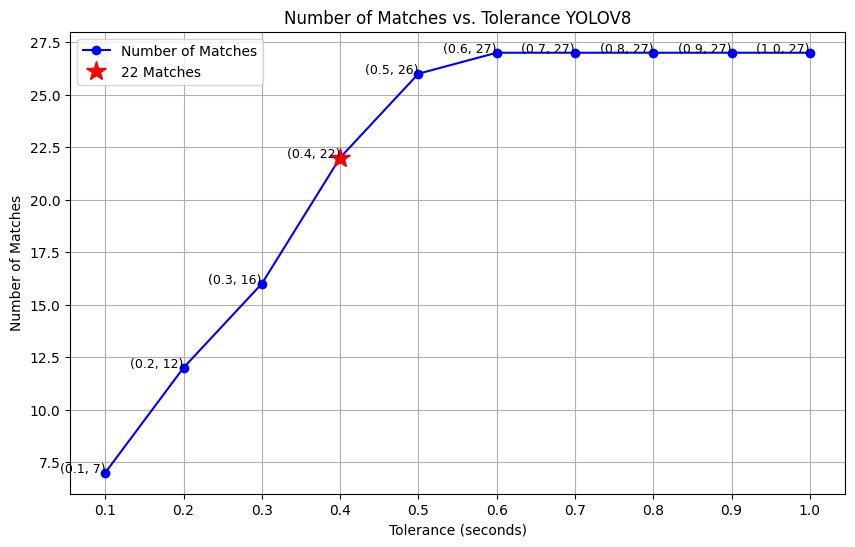

In [ ]:
import matplotlib.pyplot as plt

def compare_detections(detections_1, detections_2, tolerance):
    """Compare two dictionaries of timestamps within a given tolerance and return matches."""
    matches = []
    for time_2, value_2 in detections_2.items():
        lower_bound = time_2 - tolerance
        upper_bound = time_2 + tolerance
        for time_1, value_1 in detections_1.items():
            if lower_bound <= time_1 <= upper_bound:
                if value_1 == value_2:
                    matches.append((time_2, value_2))
                    break
    return len(matches)


tolerances = [round(x * 0.1, 1) for x in range(1, 11)]
match_counts = []

for tolerance in tolerances:
    match_count = compare_detections(converted_detections_1, converted_detections_2, tolerance)
    match_counts.append(match_count)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(tolerances, match_counts, marker='o', linestyle='-', color='b', label='Number of Matches')

# Highlight the point where number of matches is 22
highlight_tolerance = None
for tol, count in zip(tolerances, match_counts):
    if count == 22:
        highlight_tolerance = tol
        break

if highlight_tolerance is not None:
    plt.plot(highlight_tolerance, 22, 'r*', markersize=15, label='22 Matches')

# Annotate each point with its coordinates
for tol, count in zip(tolerances, match_counts):
    plt.text(tol, count, f'({tol}, {count})', fontsize=9, ha='right')

plt.xlabel('Tolerance (seconds)')
plt.ylabel('Number of Matches')
plt.title('Number of Matches vs. Tolerance YOLOV8')
plt.grid(True)
plt.xticks(tolerances)
plt.legend()
plt.show()


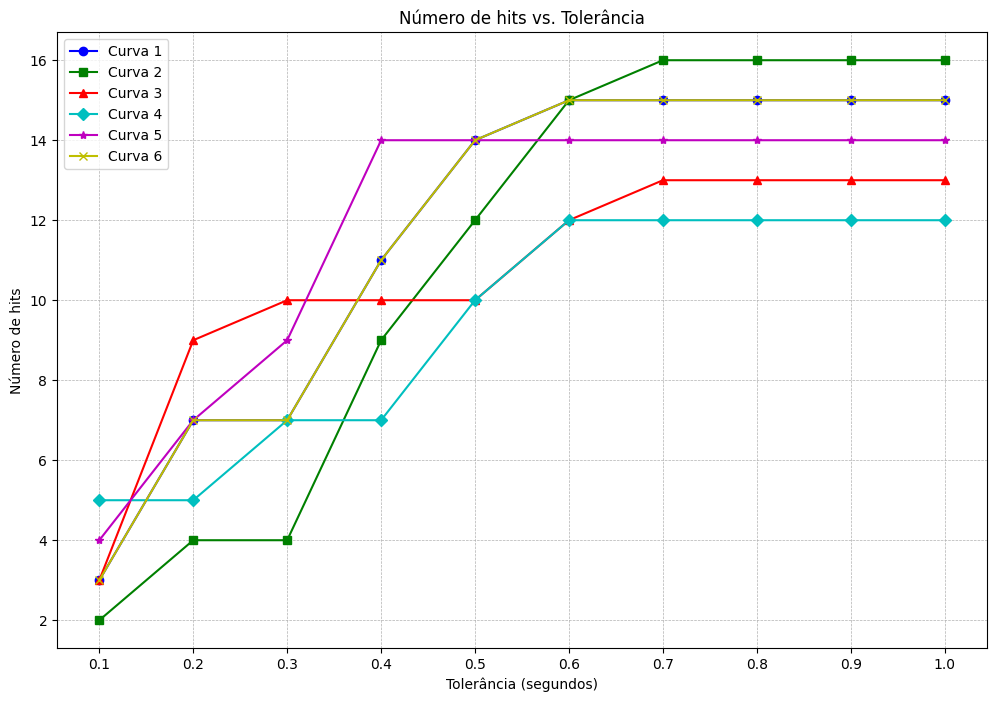

In [ ]:
import matplotlib.pyplot as plt

# Define tolerances (same for all curves)
tolerances = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Define match counts for six different curves
match_counts_sets = [
    [3, 7, 7, 11, 14, 15, 15, 15, 15, 15],  # Curve 1
    [2, 4, 4, 9, 12, 15, 16, 16, 16, 16],  # Curve 2
    [3, 9, 10, 10, 10, 12, 13, 13, 13, 13],   # Curve 3
    [5, 5, 7, 7, 10, 12, 12, 12, 12, 12],   # Curve 4
    [4, 7, 9, 14, 14, 14, 14, 14, 14, 14],   # Curve 5
    [3, 7, 7, 11, 14, 15, 15, 15, 15, 15],   # Curve 6
]

# Define labels for each curve
labels = [f'Curva {i+1}' for i in range(len(match_counts_sets))]

# Plotting
plt.figure(figsize=(12, 8))
colors = ['b', 'g', 'r', 'c', 'm', 'y']  # Different colors for each curve
markers = ['o', 's', '^', 'D', '*', 'x']  # Different markers for each curve

for i, match_counts in enumerate(match_counts_sets):
    plt.plot(tolerances, match_counts, marker=markers[i], linestyle='-', color=colors[i], label=labels[i])

# Add grid, labels, title, and legend
plt.xlabel('Tolerância (segundos)')
plt.ylabel('Número de hits')
plt.title('Número de hits vs. Tolerância')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(tolerances)
plt.legend()
plt.savefig('number_of_matches_vs_tolerance.png')
plt.show()


#Box plot with the models


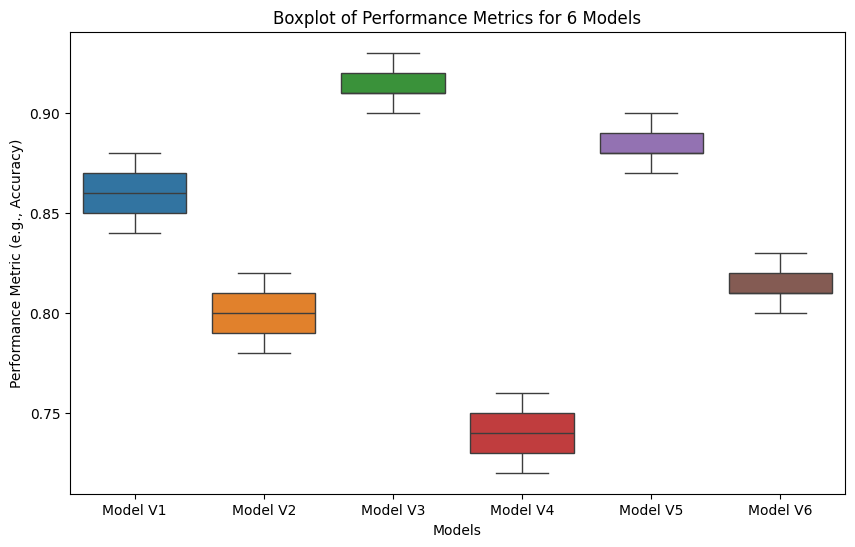

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example data: performance metrics for 6 models (e.g., accuracy, precision, etc.)
data = {
    'Model V1': [0.85, 0.87, 0.86, 0.84, 0.88],
    'Model V2': [0.78, 0.80, 0.79, 0.81, 0.82],
    'Model V3': [0.91, 0.92, 0.93, 0.90, 0.91],
    'Model V4': [0.72, 0.74, 0.73, 0.75, 0.76],
    'Model V5': [0.88, 0.87, 0.89, 0.90, 0.88],
    'Model V6': [0.81, 0.80, 0.82, 0.83, 0.81]
}

# Convert the data to a DataFrame for plotting
df = pd.DataFrame(data)

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)

# Set plot labels and title
plt.title('Boxplot of Performance Metrics for 6 Models')
plt.xlabel('Models')
plt.ylabel('Performance Metric (e.g., Accuracy)')

# Show the plot
plt.show()


#Gráfico Comparativo entre a detecção no vídeo real e no vídeo simulado


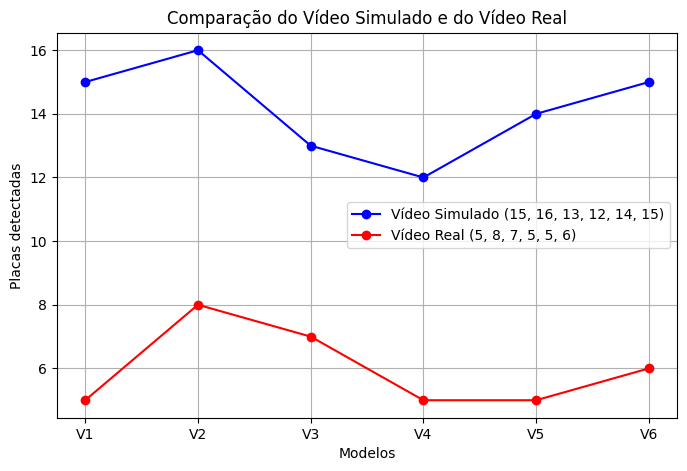

In [ ]:
import matplotlib.pyplot as plt

# Data for the two curves
models = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6']
curve1 = [15, 16, 13, 12, 14, 15]
curve2 = [5, 8, 7, 5, 5, 6]

# Plotting the graph
plt.figure(figsize=(8, 5))
plt.plot(models, curve1, marker='o', label='Vídeo Simulado (15, 16, 13, 12, 14, 15)', color='b')
plt.plot(models, curve2, marker='o', label='Vídeo Real (5, 8, 7, 5, 5, 6)', color='r')

# Adding titles and labels
plt.title('Comparação do Vídeo Simulado e do Vídeo Real')
plt.xlabel('Modelos')
plt.ylabel('Placas detectadas')
plt.legend()

plt.savefig("comparative_graphs_yolov8")

# Display the graph
plt.grid(True)
plt.show()
